<a href="https://colab.research.google.com/github/malleswarrao/topic_modeling/blob/main/Topic_Modeling_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

## <b><u> Exploratory Data Analysis </u></b>


In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
import spacy
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pandas._libs.lib import maybe_indices_to_slice
import csv
import glob

vals = []
main_dataframe = pd.DataFrame()
final_df = pd.DataFrame()
path = '/content/drive/MyDrive/almabetter/business'

files = glob.glob(path + '/*.txt')

for i in files:
  df1 = pd.read_csv(i, sep="/n",on_bad_lines='skip',encoding= 'unicode_escape')
  vals.append('business')
  main_dataframe = pd.concat([main_dataframe, df1], axis = 1)

path = '/content/drive/MyDrive/almabetter/entertainment'

files = glob.glob(path + '/*.txt')

for i in files:
  df1 = pd.read_csv(i, sep="/n",on_bad_lines='skip',encoding= 'unicode_escape')
  vals.append('entertainment')
  main_dataframe = pd.concat([main_dataframe, df1], axis = 1)

path = '/content/drive/MyDrive/almabetter/politics'

files = glob.glob(path + '/*.txt')

for i in files:
  df1 = pd.read_csv(i, sep="/n",on_bad_lines='skip',encoding= 'unicode_escape')
  vals.append('politics')
  main_dataframe = pd.concat([main_dataframe, df1], axis = 1)

path = '/content/drive/MyDrive/almabetter/sport'

files = glob.glob(path + '/*.txt')

for i in files:
  df1 = pd.read_csv(i, sep="/n",on_bad_lines='skip',encoding= 'unicode_escape')
  vals.append('sport')
  main_dataframe = pd.concat([main_dataframe, df1], axis = 1)

path = '/content/drive/MyDrive/almabetter/tech'

files = glob.glob(path + '/*.txt')

for i in files:
  df1 = pd.read_csv(i, sep="/n",on_bad_lines='skip',encoding= 'unicode_escape')
  vals.append('tech')
  main_dataframe = pd.concat([main_dataframe, df1], axis = 1)
main_dataframe_transposed = main_dataframe.T
main_dataframe_copy = main_dataframe_transposed
main_dataframe_copy = main_dataframe_copy.reset_index()

final_df[0] = main_dataframe_copy['index'].values
main_dataframe_copy = main_dataframe_copy.iloc[: , 1:]
main_dataframe_copy['new'] = main_dataframe_copy.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)
final_df[1]= main_dataframe_copy['new'].values
final_df[2]=vals

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


                                   0  \
0  Yukos unit buyer faces loan claim   
1  Ad sales boost Time Warner profit   
2   Dollar gains on Greenspan speech   
3   US trade gap hits record in 2004   
4  High fuel prices hit BA's profits   

                                                   1         2  
0  The owners of embattled Russian oil giant Yuko...  business  
1  Quarterly profits at US media giant TimeWarner...  business  
2  The dollar has hit its highest level against t...  business  
3  The gap between US exports and imports hit an ...  business  
4  British Airways has blamed high fuel prices fo...  business  


In [ ]:
final_df=final_df.drop_duplicates()


In [ ]:
final_df[2].value_counts(normalize=True)*100

business         23.670588
sport            23.670588
politics         18.964706
entertainment    17.364706
tech             16.329412
Name: 2, dtype: float64

In [ ]:
final_df[1] = final_df[1].astype('str') 


In [ ]:
# Removing numbers
def remove_numbers(text):
	number_pattern = r'\d+'
	without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
	return without_number

In [ ]:
import re
final_df[1]=final_df[1].apply(remove_numbers)


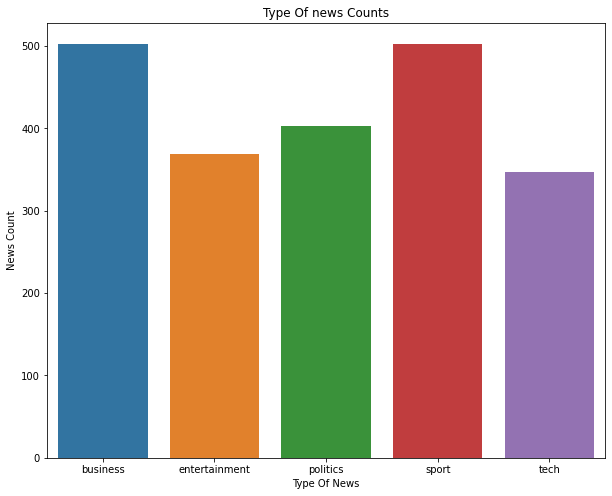

In [ ]:
import warnings 
plt.figure(figsize=(10,8))
warnings.filterwarnings("ignore")
sb.countplot(final_df[2], data=final_df)
plt.xlabel("Type Of News")
plt.ylabel("News Count")
plt.title("Type Of news Counts")
plt.show()

In [ ]:

final_df[3]=final_df[2]
print(final_df)
print(final_df.shape)
iter_val=0
for i in range(len(final_df)):
  if(final_df.iloc[i,2]=='business'):
    if(iter_val<2):
      final_df.iloc[i,3]='business_test'
      iter_val=iter_val+1

                                      0  \
0     Yukos unit buyer faces loan claim   
1     Ad sales boost Time Warner profit   
2      Dollar gains on Greenspan speech   
3      US trade gap hits record in 2004   
4     High fuel prices hit BA's profits   
...                                 ...   
2219    Net fingerprints combat attacks   
2220   BT program to beat dialler scams   
2221    Bad e-mail habits sustains spam   
2222  Microsoft plans 'safer ID' system   
2224   Beckham virus spotted on the net   

                                                      1         2         3  
0     The owners of embattled Russian oil giant Yuko...  business  business  
1     Quarterly profits at US media giant TimeWarner...  business  business  
2     The dollar has hit its highest level against t...  business  business  
3     The gap between US exports and imports hit an ...  business  business  
4     British Airways has blamed high fuel prices fo...  business  business  
...            

In [ ]:
iter_val=0
for i in range(len(final_df)):
  # print(final_df.iloc[i,])
  if(final_df.iloc[i,2]=='entertainment'):
    if(iter_val<2):
      final_df.iloc[i,3]='entertainment_test'
      iter_val=iter_val+1
iter_val=0
for i in range(len(final_df)):
  # print(final_df.iloc[i,])
  if(final_df.iloc[i,2]=='politics'):
    if(iter_val<2):
      final_df.iloc[i,3]='politics_test'
      iter_val=iter_val+1
iter_val=0
for i in range(len(final_df)):
  # print(final_df.iloc[i,])
  if(final_df.iloc[i,2]=='sport'):
    if(iter_val<2):
      final_df.iloc[i,3]='sport_test'
      iter_val=iter_val+1
iter_val=0
for i in range(len(final_df)):
  # print(final_df.iloc[i,])
  if(final_df.iloc[i,2]=='tech'):
    if(iter_val<2):
      final_df.iloc[i,3]='tech_test'
      iter_val=iter_val+1
print(final_df.shape)

(2125, 4)
